In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os

from scipy.optimize import curve_fit

# Check and Clean Data

In [2]:
# load in the workout.txt data 
path = os.path.join(os.getcwd(), 'data/workout_data/')

filename = 'workouts.txt'

df = pd.read_csv(path + filename)

df

,Date,Exercise,Weight(lbs),Reps
0,2024-03-19,Dumbbell Bench,85,10
1,2024-03-19,Dumbbell Bench,85,8
2,2024-03-19,Dumbbell Bench,85,6
3,2024-03-19,Lateral Raise,30,12
4,2024-03-19,Lateral Raise,30,10
...,...,...,...,...
2951,2025-03-14,Machine Curl,170,8
2952,2025-03-14,Machine Curl,140,8
2953,2025-03-14,Reverse Hack Squat,270,10
2954,2025-03-14,Reverse Hack Squat,360,8


In [3]:
# Assign a muscle group to each exercise
exercies = df['Exercise'].unique()

# alphabetize the exercises
exercies = np.sort(exercies)

for exercise in exercies:
    print(exercise)

Abductors
Barbell RDL
Barbell Shoulder Press
Barbell Squat
Bench
Bicep Curl
Cable Chest Fly
Cable Chest Press
Cable Curls
Cable Lateral Raise
Cable Press (Down)
Cable Press (Up)
Calf Machine
Calf Raise
Close-Grip Bench
Close-Grip Pulldown
Decline Bench
Deficit Lunges
Dips
Dumbbell Bench
EZ Curl
Goblet Squat
Hack Squat
Hammer Curl
Hip Thrust
Hip Thrust Machine
Incline Bench
Incline Dumbbell Press
Incline Machine Press
Incline Smith Bench
Lat Pulldown
Lateral Raise
Lateral Raise (Cable)
Leg Curl
Leg Extension
Leg Press
Leg Push Back
Machine Chest Press
Machine Curl
Machine Lateral Raise
Machine Row
Machine Row (Horizontal)
Machine Row (Vertical)
Machine Shoulder Press
Military Press
Overhead Tricep
Overhead Tricep Cable
Pec Dec
Preacher Curls
Pull-Ups
RDL
Rear Crossover
Rear Pec Dec
Reverse Curls
Reverse Hack Squat
Seated Curl
Seated Leg Curl
Seated Row
Shoulder Press
Shoulder Press Machine
Single Arm Lat Pull
Single Arm Row
Single Arm Tricep Pushdown
Single Leg Extension
Single Leg Pres

In [4]:
# Assign muscle groups to each exercise
primary_muscle_group = {
    'Abductors': 'Glutes',
    'Barbell RDL': 'Hamstrings',
    'Barbell Shoulder Press': 'Shoulders',
    'Barbell Squat': 'Quads',
    'Bench': 'Chest',
    'Bicep Curl': 'Biceps',
    'Bicep Curl Machine': 'Biceps',
    'Bicep Machine': 'Biceps',
    'Cable Chest Fly': 'Chest',
    'Cable Chest Press': 'Chest',
    'Cable Curls': 'Biceps',
    'Cable Lateral Raise': 'Shoulders',
    'Cable Pec Dec': 'Chest',
    'Cable Press (Down)': 'Chest',
    'Cable Press (Up)': 'Chest',
    'Calf Machine': 'Calves',
    'Calf Raise': 'Calves',
    'Close-Grip Bench': 'Chest',
    'Close-Grip Pulldown': 'Lats',
    'Decline Bench': 'Chest',
    'Deficit Lunges': 'Quads',
    'Dips': 'Triceps',
    'Dumbbell Bench': 'Chest',
    'EZ Curl': 'Biceps',
    'Goblet Squat': 'Quads',
    'Hack Squat': 'Quads',
    'Hammer Curl': 'Biceps',
    'Hip Thrust': 'Glutes',
    'Hip Thrust Machine': 'Glutes',
    'Incline Bench': 'Chest',
    'Incline Dumbbell Press': 'Chest',
    'Incline Machine Press': 'Chest',
    'Incline Smith Bench': 'Chest',
    'Lat Pulldown': 'Lats',
    'Lateral Raise': 'Shoulders',
    'Lateral Raise (Cable)': 'Shoulders',
    'Lateral Raise Machine': 'Shoulders',
    'Seated Leg Curl': 'Hamstrings',
    'Leg Curl': 'Hamstrings',
    'Leg Extension': 'Quads',
    'Leg Press': 'Quads',
    'Leg Push Back': 'Glutes',
    'Machine Chest Press': 'Chest',
    'Machine Curl': 'Biceps',
    'Machine Lateral Raise': 'Shoulders',
    'Machine Press': 'Chest',
    'Machine Pull': 'Lats',
    'Machine Pull (Vertical)': 'Lats',
    'Machine Row': 'Back',
    'Machine Row (Horizontal)': 'Back',
    'Machine Row (Vertical)': 'Lats',
    'Machine Shoulder Press': 'Shoulders',
    'Military Press': 'Shoulders',
    'Overhead Tricep': 'Triceps',
    'Overhead Tricep Cable': 'Triceps',
    'Pec Dec': 'Chest',
    'Preacher Curls': 'Biceps',
    'Pull-Ups': 'Lats',
    'Pulldown': 'Lats',
    'RDL': 'Hamstrings',
    'Rear Crossover': 'Shoulders',
    'Rear Pec Dec': 'Shoulders',
    'Reverse Curls': 'Biceps',
    'Reverse Hack Squat': 'Quads',
    'Seated Curl': 'Biceps',
    'Seated Leg Curl': 'Hamstrings',
    'Seated Row': 'Back',
    'Shoulder Press': 'Shoulders',
    'Shoulder Press Machine': 'Shoulders',
    'Single Arm Lat Pull': 'Lats',
    'Single Arm Row': 'Lats',
    'Single Arm Tricep Pushdown': 'Triceps',
    'Single Leg Extension': 'Quads',
    'Single Leg Press': 'Quads',
    'Skull Crushers': 'Triceps',
    'Smith Incline': 'Chest',
    'Smith Machine Squat': 'Quads',
    'Split Squat': 'Quads',
    'T-Bar Row': 'Back',
    'Tricep Cable (Up)': 'Triceps',
    'Tricep Extension': 'Triceps',
    'Tricep Extension (Cable)': 'Triceps',
    'Tricep Overhead': 'Triceps',
    'Tricep Pushdown': 'Triceps',
    'Tricep Extension (up)': 'Triceps',
    'Tricep Machine': 'Triceps',
    'Wide-Grip Pulldown':  'Lats',
}



In [5]:
secondary_muscle_group = {
    'Abductors': 'Abductors',
    'Barbell RDL': 'Low Back',
    'Barbell Shoulder Press': None,
    'Barbell Squat': 'Glutes',
    'Bench': 'Triceps',
    'Bicep Curl': None,
    'Bicep Curl Machine': None,
    'Bicep Machine': None,
    'Cable Chest Fly': None,
    'Cable Chest Press': 'Triceps',
    'Cable Curls': None,
    'Cable Lateral Raise': None,
    'Cable Pec Dec': None,
    'Cable Press (Down)': 'Triceps',
    'Cable Press (Up)': 'Triceps',
    'Calf Machine': None,
    'Calf Raise': None,
    'Close-Grip Bench': 'Triceps',
    'Close-Grip Pulldown': 'Biceps',
    'Decline Bench': 'Triceps',
    'Deficit Lunges': 'Glutes',
    'Dips': 'Chest',
    'Dumbbell Bench': 'Triceps',
    'EZ Curl': None,
    'Goblet Squat': 'Glutes',
    'Hack Squat': 'Glutes',
    'Hammer Curl': None,
    'Hip Thrust': 'Hamstrings',
    'Hip Thrust Machine': 'Hamstrings',
    'Incline Bench': 'Triceps',
    'Incline Dumbbell Press': 'Triceps',
    'Incline Machine Press': 'Triceps',
    'Incline Smith Bench': 'Triceps',
    'Lat Pulldown': 'Biceps',
    'Lateral Raise': None,
    'Lateral Raise (Cable)': None,
    'Lateral Raise Machine': None,
    'Seated Leg Curl': None,
    'Leg Curl': None,
    'Leg Extension': None,
    'Leg Press': 'Glutes',
    'Leg Push Back': None,
    'Machine Chest Press': 'Triceps',
    'Machine Curl': None,
    'Machine Lateral Raise': None,
    'Machine Press': 'Trcieps',
    'Machine Pull': 'Biceps',
    'Machine Pull (Vertical)': 'Biceps',
    'Machine Row': None,
    'Machine Row (Horizontal)': None,
    'Machine Row (Vertical)': 'Biceps',
    'Machine Shoulder Press': None,
    'Military Press': None,
    'Overhead Tricep': None,
    'Overhead Tricep Cable': None,
    'Pec Dec': None,
    'Preacher Curls': None,
    'Pull-Ups': 'Biceps',
    'Pulldown': 'Biceps',
    'RDL': 'Low Back',
    'Rear Crossover': None,
    'Rear Pec Dec': None,
    'Reverse Curls': None,
    'Reverse Hack Squat': 'Glutes',
    'Seated Curl': None,
    'Seated Leg Curl': None,
    'Seated Row': None,
    'Shoulder Press': None,
    'Shoulder Press Machine': None,
    'Single Arm Lat Pull': None,
    'Single Arm Row': None,
    'Single Arm Tricep Pushdown': None,
    'Single Leg Extension': 'Glutes',
    'Single Leg Press': 'Glutes',
    'Skull Crushers': None,
    'Smith Incline': 'Triceps',
    'Smith Machine Squat': 'Glutes',
    'Split Squat': 'Glutes',
    'T-Bar Row': None,
    'Tricep Cable (Up)': None,
    'Tricep Extension': None,
    'Tricep Extension (Cable)': None,
    'Tricep Overhead': None,
    'Tricep Pushdown': None,
    'Tricep Extension (up)': None,
    'Tricep Machine': None,
    'Wide-Grip Pulldown':  'Biceps',
}

In [6]:
# add primary muscle group to the dataframe
df['Primary Muscle Group'] = df['Exercise'].map(primary_muscle_group)
df['Secondary Muscle Group'] = df['Exercise'].map(secondary_muscle_group)


df.head()

,Date,Exercise,Weight(lbs),Reps,Primary Muscle Group,Secondary Muscle Group
0,2024-03-19,Dumbbell Bench,85,10,Chest,Triceps
1,2024-03-19,Dumbbell Bench,85,8,Chest,Triceps
2,2024-03-19,Dumbbell Bench,85,6,Chest,Triceps
3,2024-03-19,Lateral Raise,30,12,Shoulders,None
4,2024-03-19,Lateral Raise,30,10,Shoulders,None


In [7]:
# fix data
df['Date'] = pd.to_datetime(df['Date'])

# Substitue BW for 180 
df['Weight(lbs)'] = df['Weight(lbs)'].replace('BW', 180)

df


,Date,Exercise,Weight(lbs),Reps,Primary Muscle Group,Secondary Muscle Group
0,2024-03-19,Dumbbell Bench,85,10,Chest,Triceps
1,2024-03-19,Dumbbell Bench,85,8,Chest,Triceps
2,2024-03-19,Dumbbell Bench,85,6,Chest,Triceps
3,2024-03-19,Lateral Raise,30,12,Shoulders,None
4,2024-03-19,Lateral Raise,30,10,Shoulders,None
...,...,...,...,...,...,...
2951,2025-03-14,Machine Curl,170,8,Biceps,None
2952,2025-03-14,Machine Curl,140,8,Biceps,None
2953,2025-03-14,Reverse Hack Squat,270,10,Quads,Glutes
2954,2025-03-14,Reverse Hack Squat,360,8,Quads,Glutes


In [8]:
# change weight and reps to numeric 
df['Weight(lbs)'] = pd.to_numeric(df['Weight(lbs)'])
df['Reps'] = pd.to_numeric(df['Reps'])

# Add total Volume 
df['Volume'] = df['Weight(lbs)'] * df['Reps']

df.head()

,Date,Exercise,Weight(lbs),Reps,Primary Muscle Group,Secondary Muscle Group,Volume
0,2024-03-19,Dumbbell Bench,85.0,10,Chest,Triceps,850.0
1,2024-03-19,Dumbbell Bench,85.0,8,Chest,Triceps,680.0
2,2024-03-19,Dumbbell Bench,85.0,6,Chest,Triceps,510.0
3,2024-03-19,Lateral Raise,30.0,12,Shoulders,None,360.0
4,2024-03-19,Lateral Raise,30.0,10,Shoulders,None,300.0


In [9]:
# save the data to a csv file
df.to_csv(path + 'workouts_cleaned.csv', index=False)

In [14]:
# Check if any Muslce Group is not assigned a value
df['Primary Muscle Group'].isnull().sum()

# get the null dataset
df.loc[df['Primary Muscle Group'].isnull()]

,Date,Exercise,Weight(lbs),Reps,Primary Muscle Group,Secondary Muscle Group,Volume


# First Pass Plotting

In [ ]:
# # group by data and sum the total volume
# squat_data = squat_data.groupby('Date')['Volume'].sum()

# # plot the data over time 
# plt.figure(figsize=(10, 4))

# plt.scatter(squat_data.index, squat_data.values)
# plt.show()

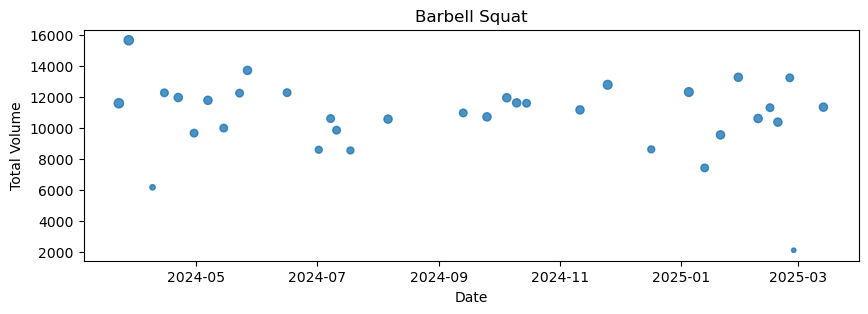

In [ ]:
# Plot Volume over time for all exercises 
for exercise in ['Barbell Squat']: #df.Exercise.unique():
    data = df[df['Exercise'] == exercise]
    num_sets = data.groupby('Date')['Volume'].size()
    total_volume = data.groupby('Date')['Volume'].sum()
 
    plt.figure(figsize=(10, 3))
    plt.scatter(total_volume.index, total_volume.values, alpha=0.8, s=5*num_sets.values)
    plt.xlabel('Date')
    plt.ylabel('Total Volume')
    plt.title(exercise)
    plt.show()

In [ ]:
# for exercise in ['Barbell Squat']: #df.Exercise.unique():
#     data = df[df['Exercise'] == exercise]
#     max_weight = data.groupby('Date')['Weight(lbs)'].max()
    
#     # line of best fit 
#     x = np.arange(len(max_weight))
#     y = max_weight.values
#     p = np.polyfit(x, y, 2)
#     f = np.poly1d(p)
 
#     plt.figure(figsize=(10, 3))
#     plt.scatter(max_weight.index, max_weight.values, alpha=0.8, s=10)
#     plt.plot(max_weight.index, f(x), color='red')
#     plt.xlabel('Date')
#     plt.ylabel('Max Weight')
#     plt.title(exercise)
#     plt.show()

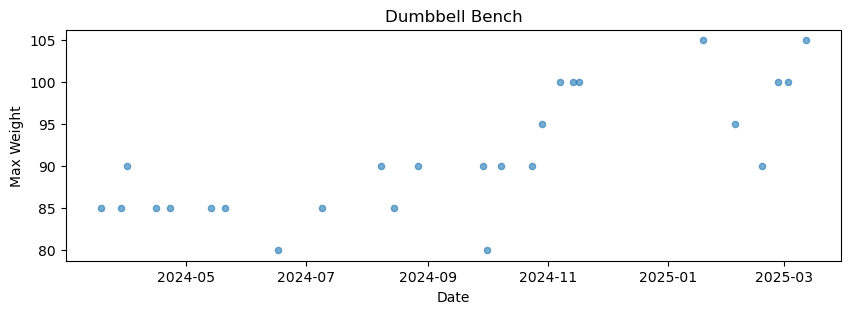

<Figure size 640x480 with 0 Axes>

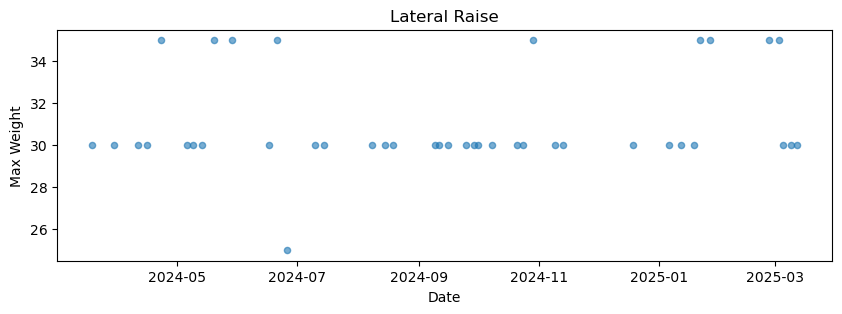

<Figure size 640x480 with 0 Axes>

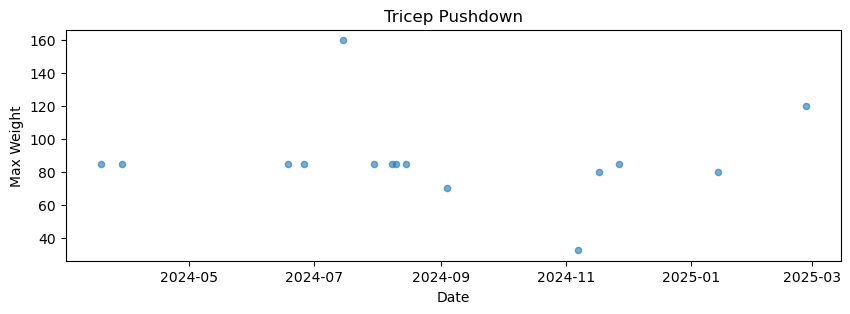

<Figure size 640x480 with 0 Axes>

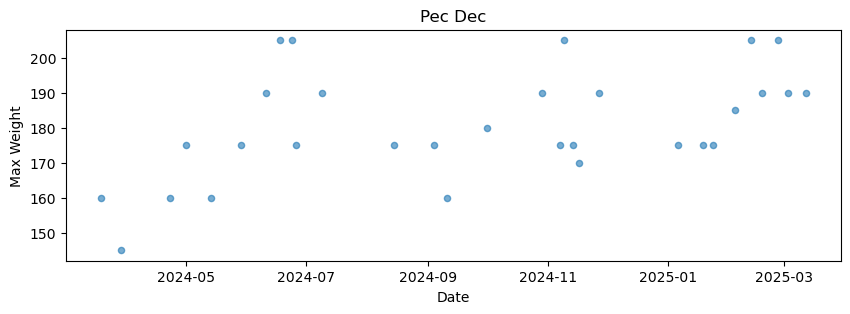

<Figure size 640x480 with 0 Axes>

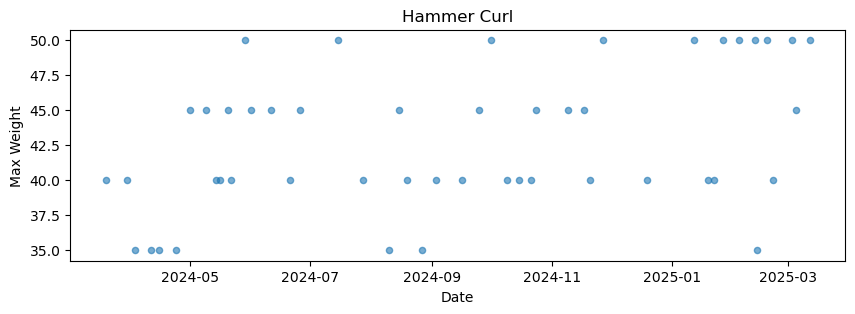

<Figure size 640x480 with 0 Axes>

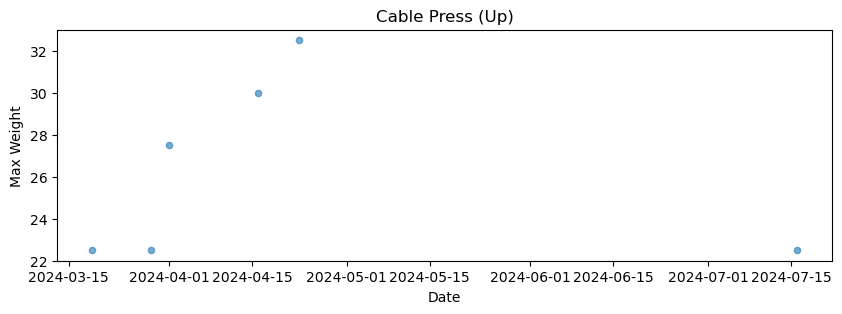

<Figure size 640x480 with 0 Axes>

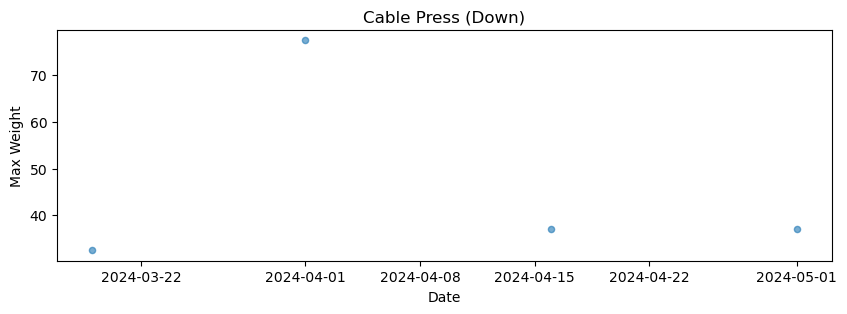

<Figure size 640x480 with 0 Axes>

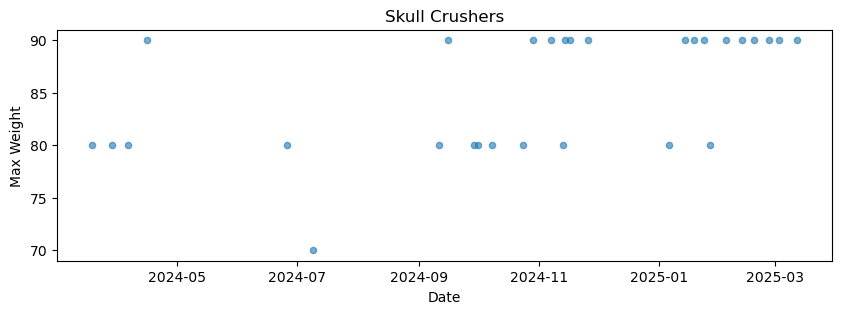

<Figure size 640x480 with 0 Axes>

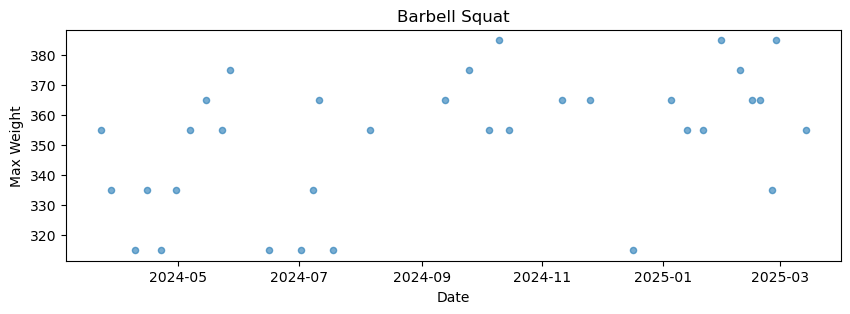

<Figure size 640x480 with 0 Axes>

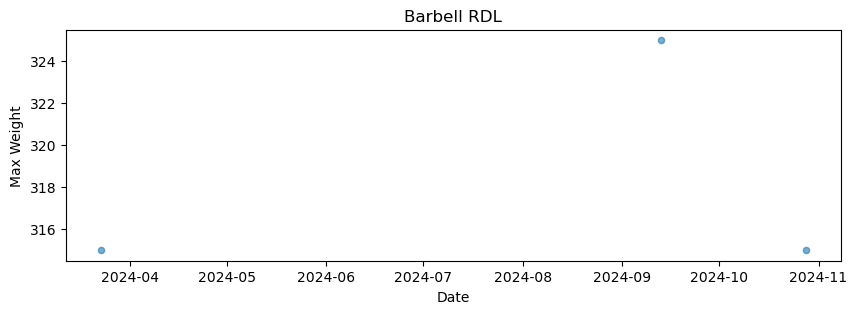

<Figure size 640x480 with 0 Axes>

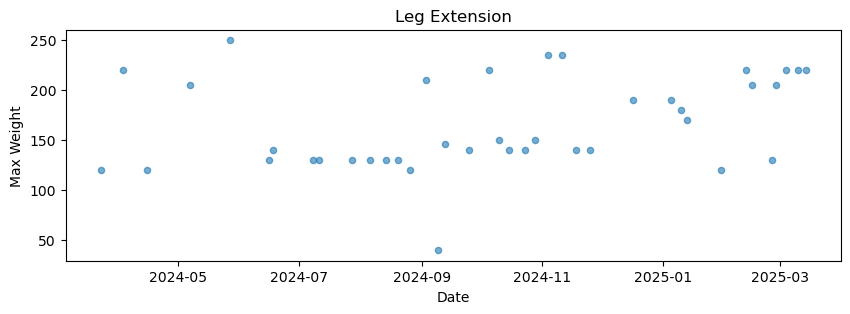

<Figure size 640x480 with 0 Axes>

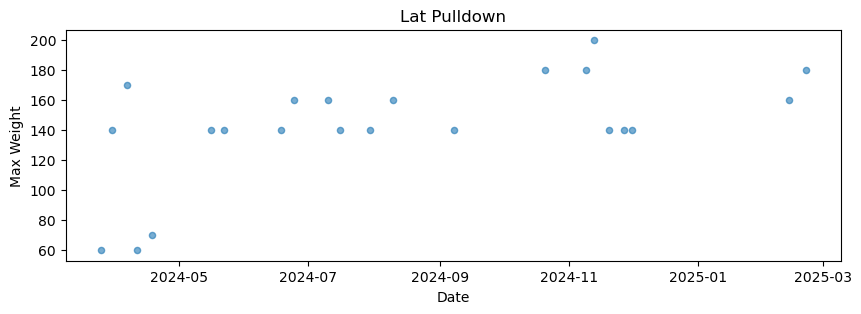

<Figure size 640x480 with 0 Axes>

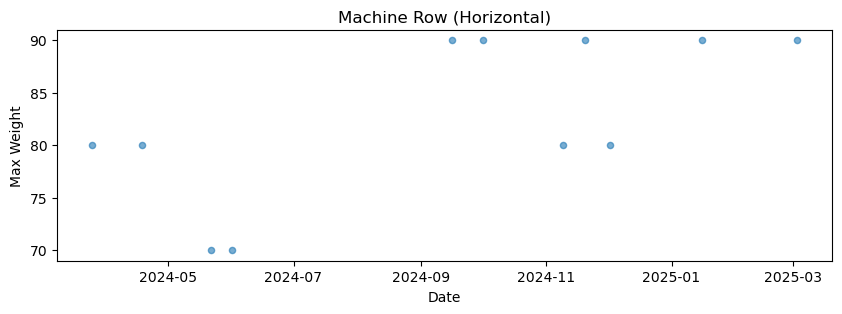

<Figure size 640x480 with 0 Axes>

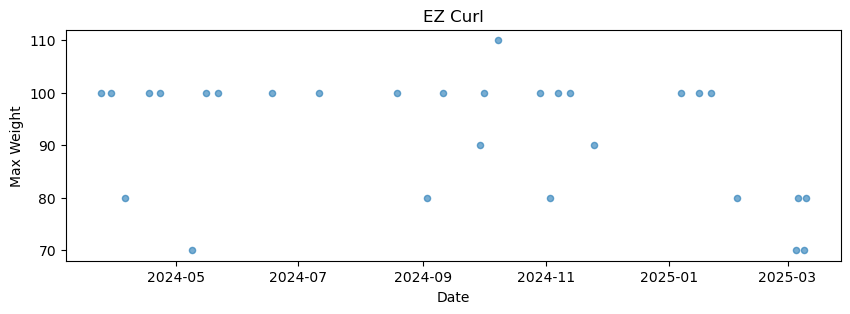

<Figure size 640x480 with 0 Axes>

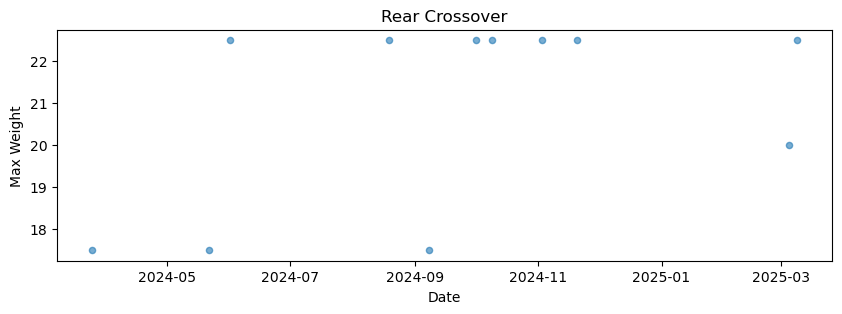

<Figure size 640x480 with 0 Axes>

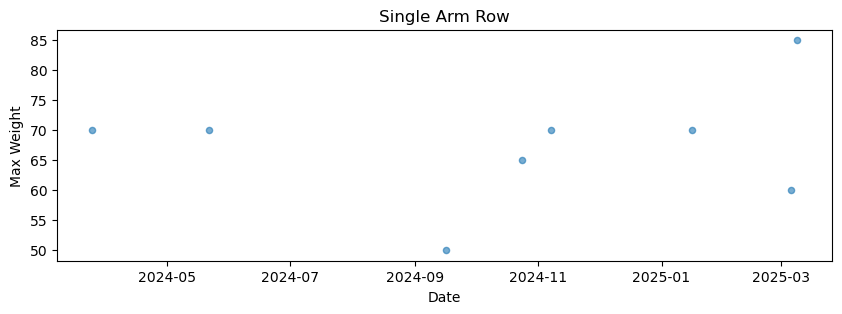

<Figure size 640x480 with 0 Axes>

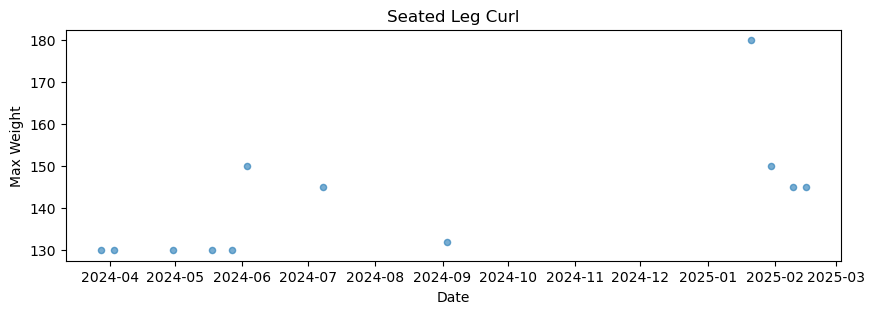

<Figure size 640x480 with 0 Axes>

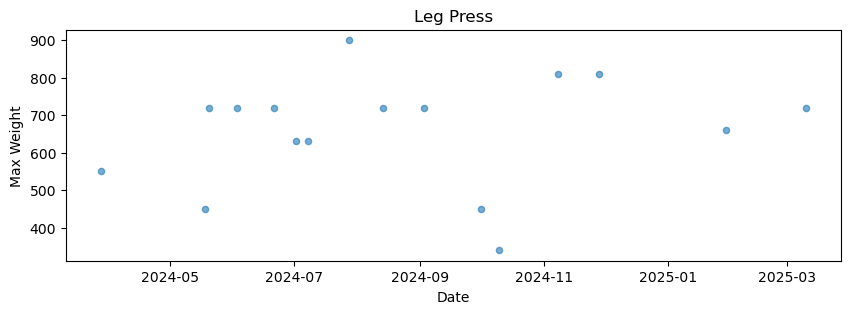

<Figure size 640x480 with 0 Axes>

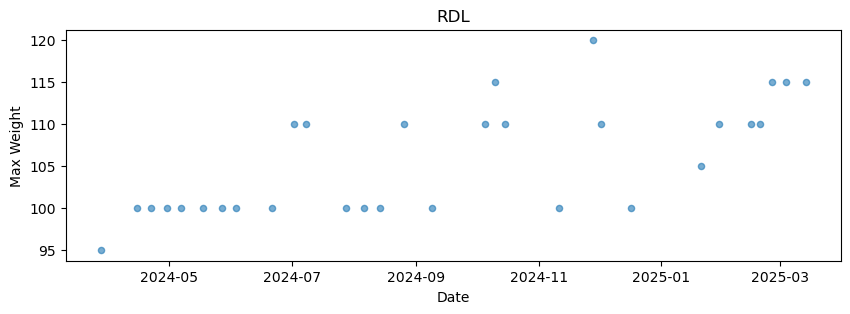

<Figure size 640x480 with 0 Axes>

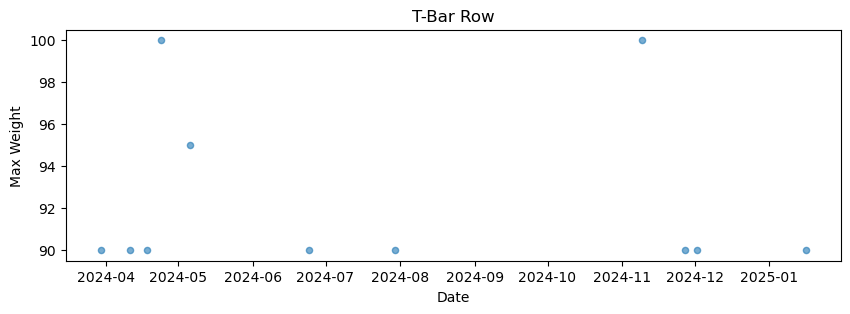

<Figure size 640x480 with 0 Axes>

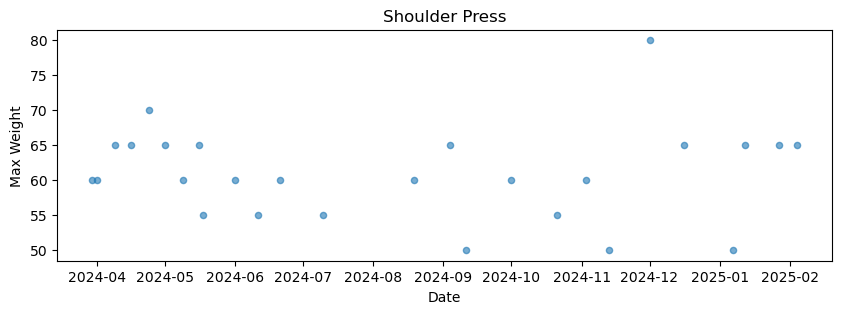

<Figure size 640x480 with 0 Axes>

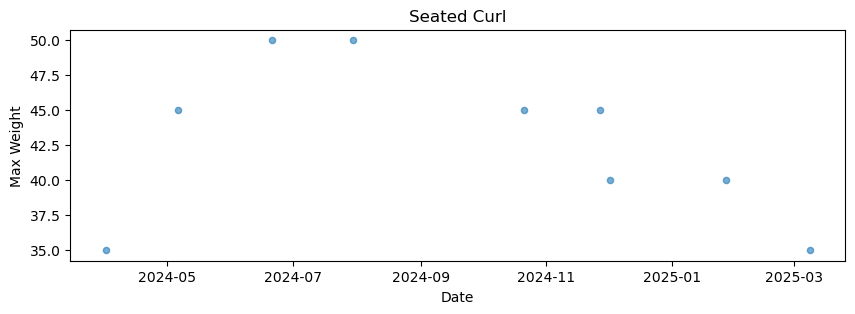

<Figure size 640x480 with 0 Axes>

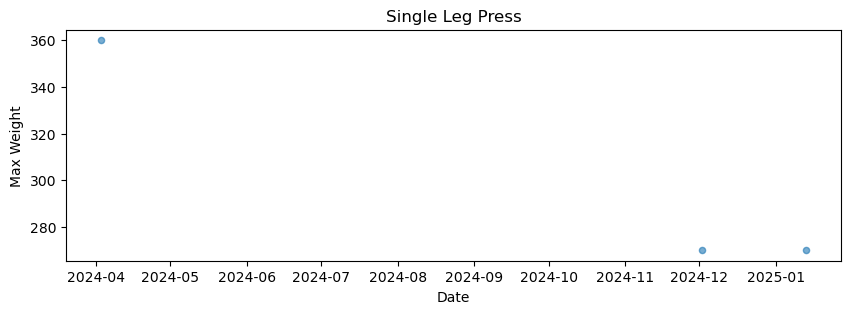

<Figure size 640x480 with 0 Axes>

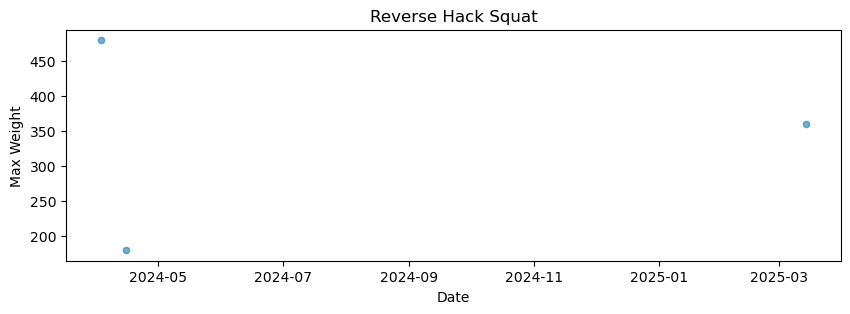

<Figure size 640x480 with 0 Axes>

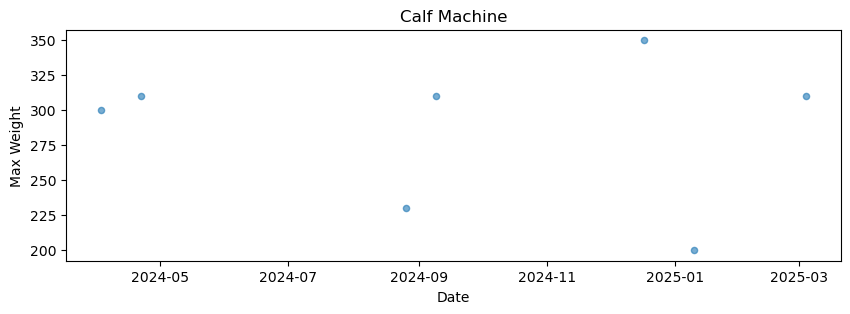

<Figure size 640x480 with 0 Axes>

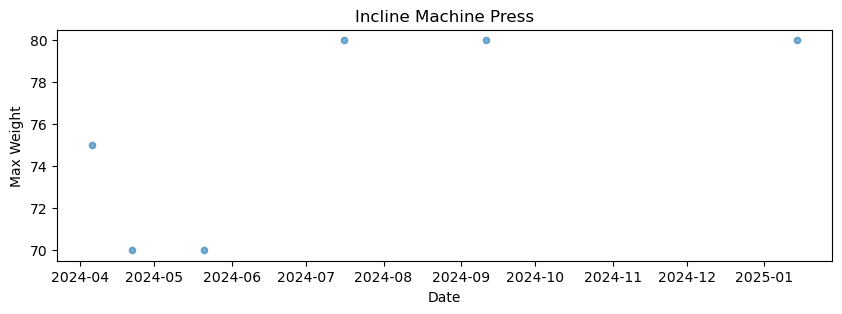

<Figure size 640x480 with 0 Axes>

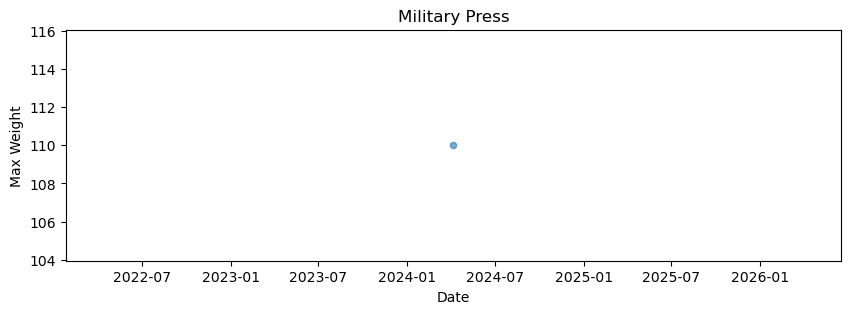

<Figure size 640x480 with 0 Axes>

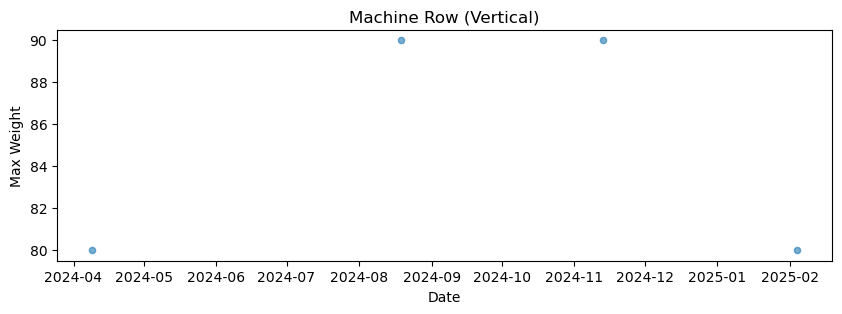

<Figure size 640x480 with 0 Axes>

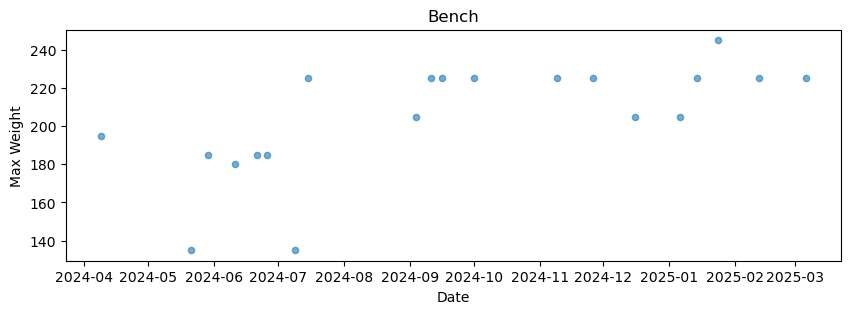

<Figure size 640x480 with 0 Axes>

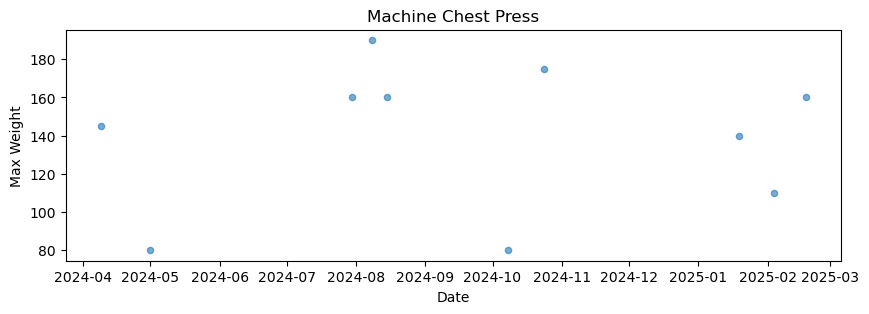

<Figure size 640x480 with 0 Axes>

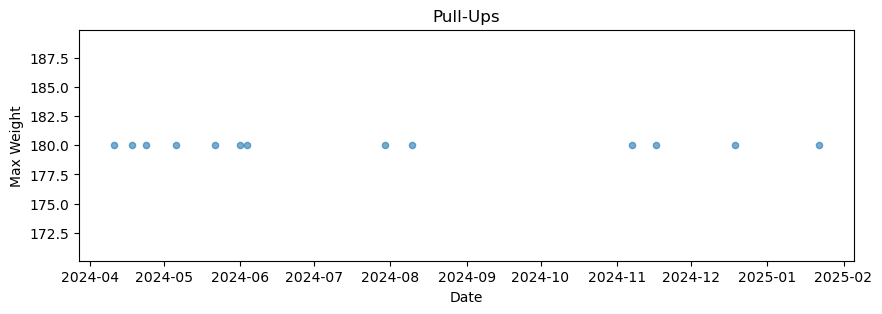

<Figure size 640x480 with 0 Axes>

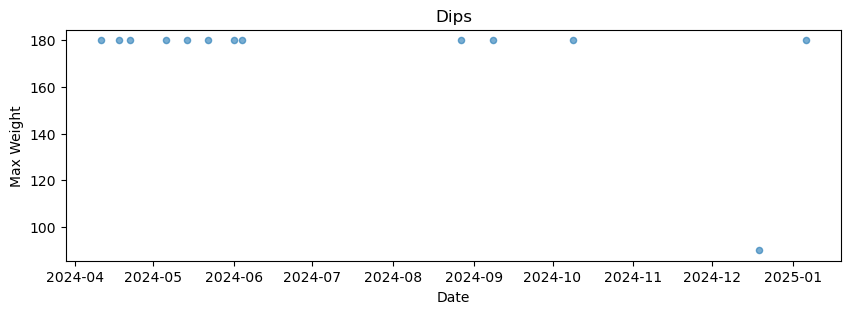

<Figure size 640x480 with 0 Axes>

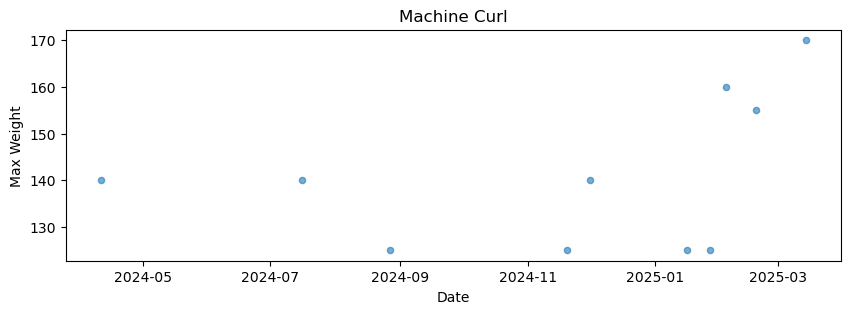

<Figure size 640x480 with 0 Axes>

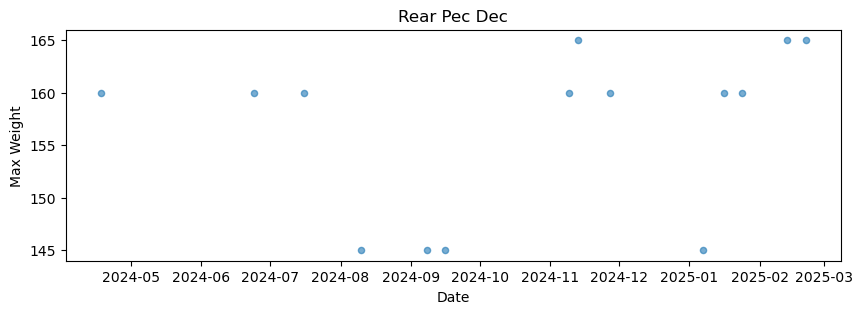

<Figure size 640x480 with 0 Axes>

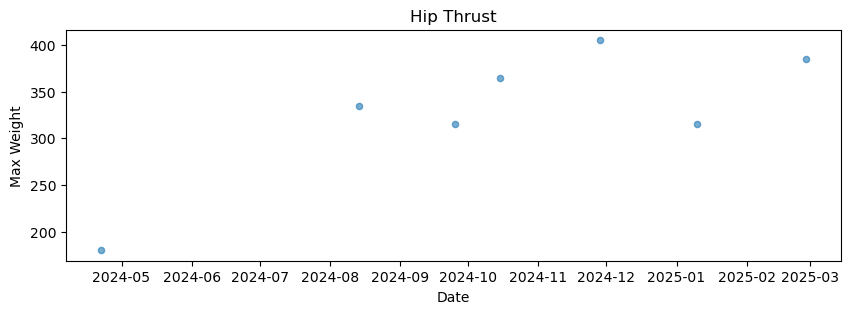

<Figure size 640x480 with 0 Axes>

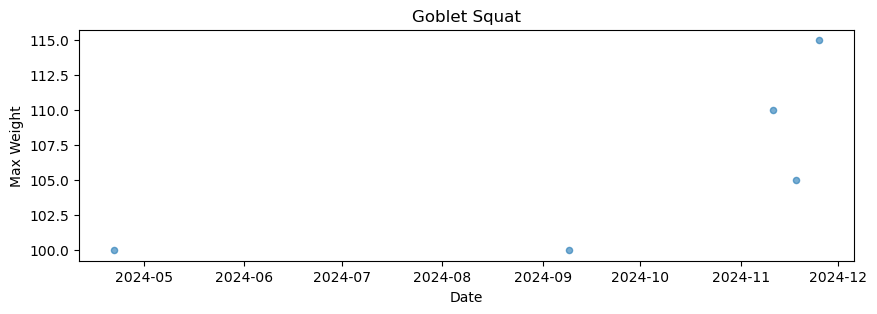

<Figure size 640x480 with 0 Axes>

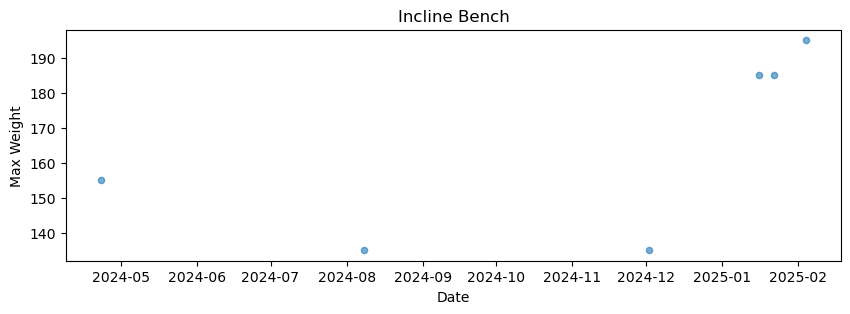

<Figure size 640x480 with 0 Axes>

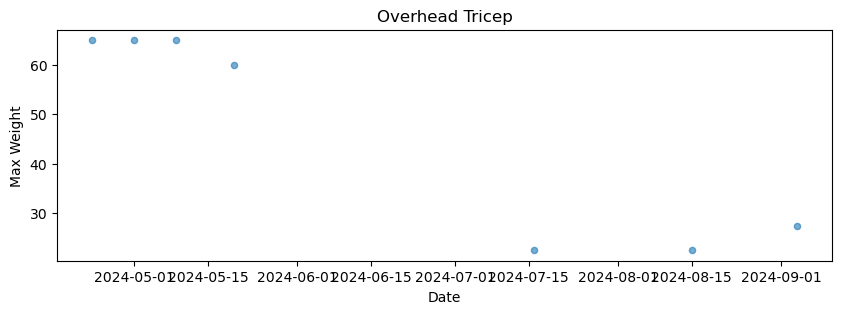

<Figure size 640x480 with 0 Axes>

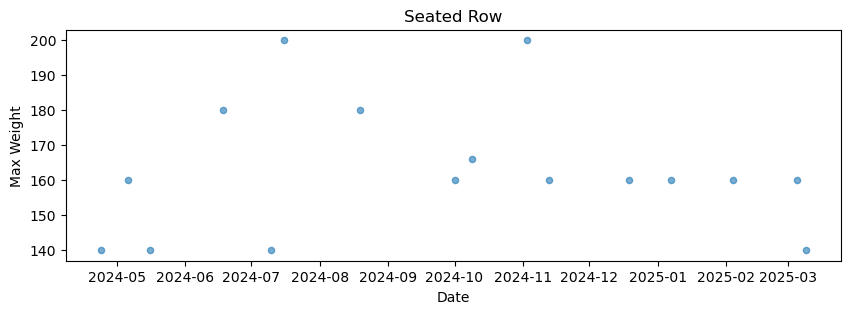

<Figure size 640x480 with 0 Axes>

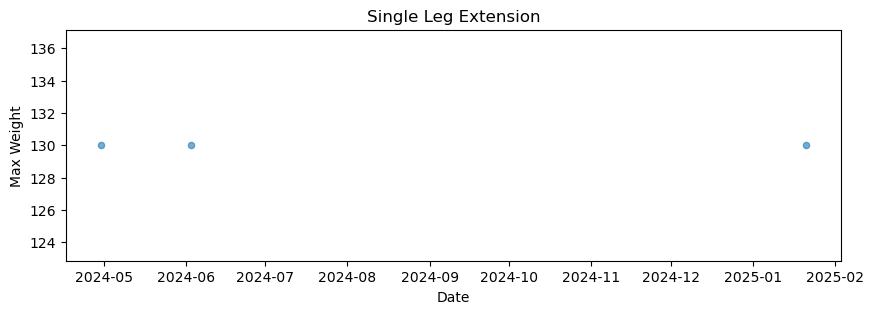

<Figure size 640x480 with 0 Axes>

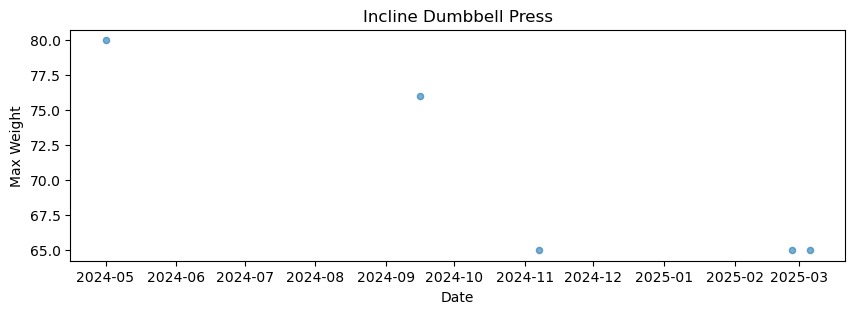

<Figure size 640x480 with 0 Axes>

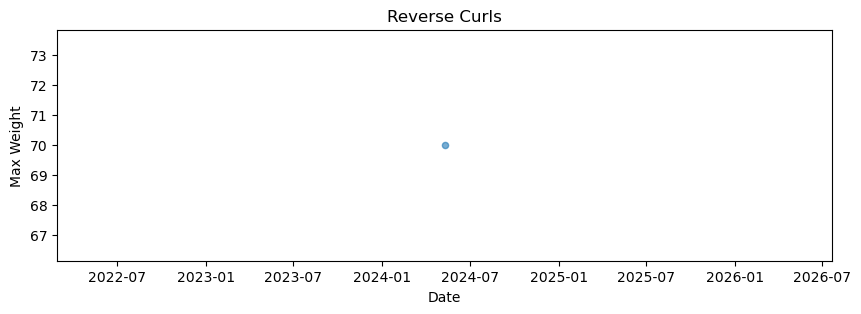

<Figure size 640x480 with 0 Axes>

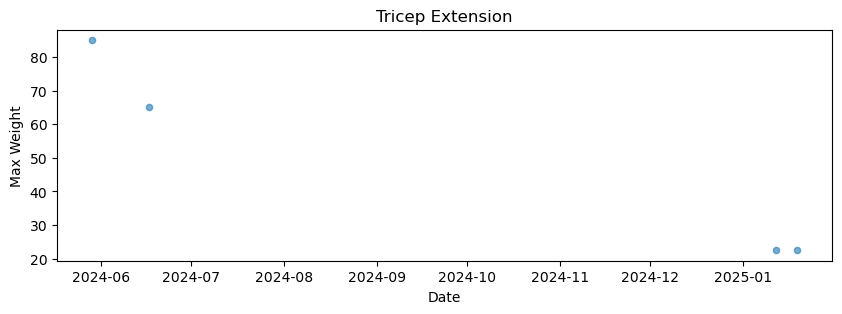

<Figure size 640x480 with 0 Axes>

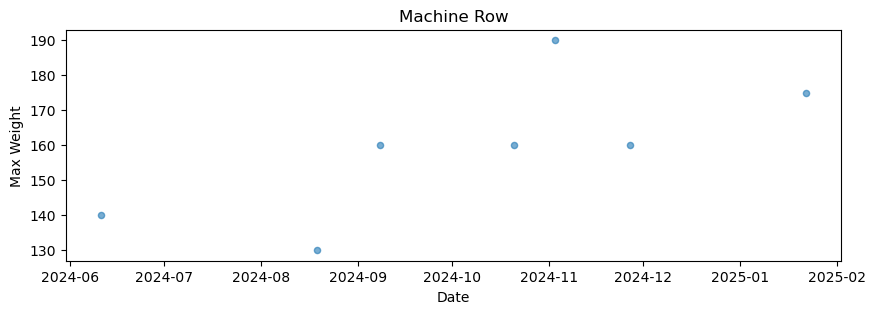

<Figure size 640x480 with 0 Axes>

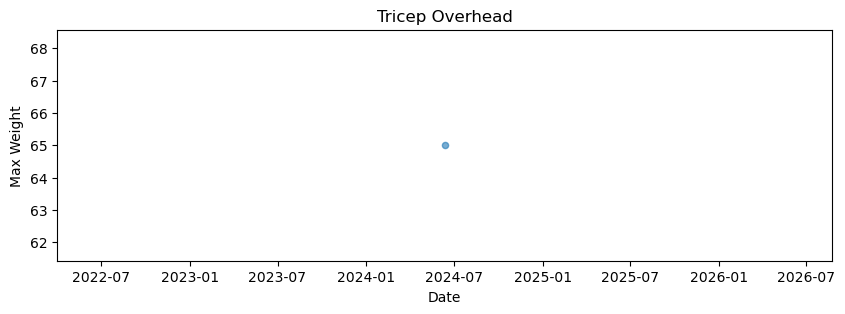

<Figure size 640x480 with 0 Axes>

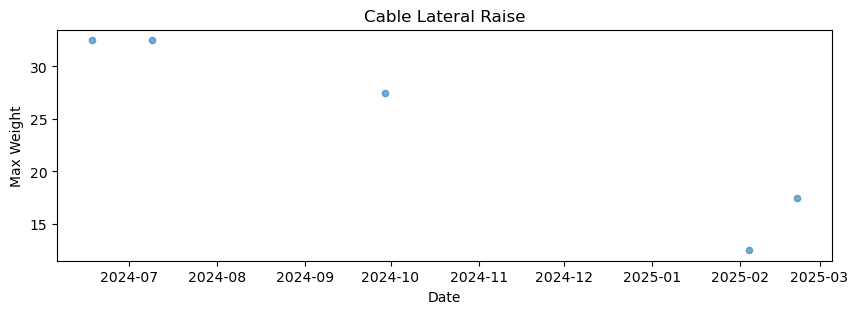

<Figure size 640x480 with 0 Axes>

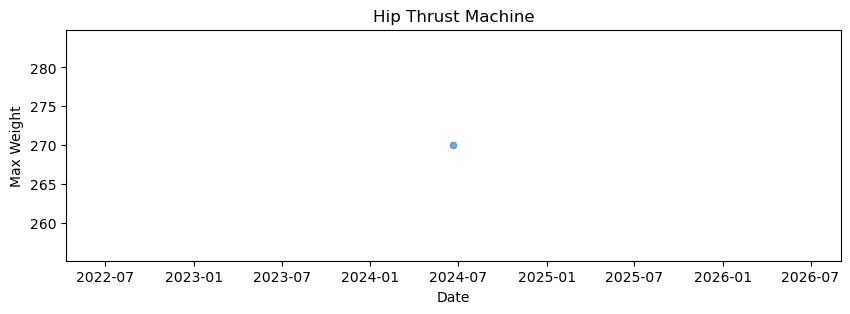

<Figure size 640x480 with 0 Axes>

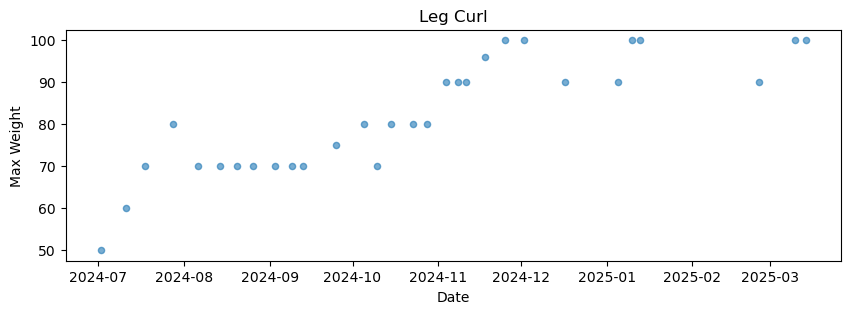

<Figure size 640x480 with 0 Axes>

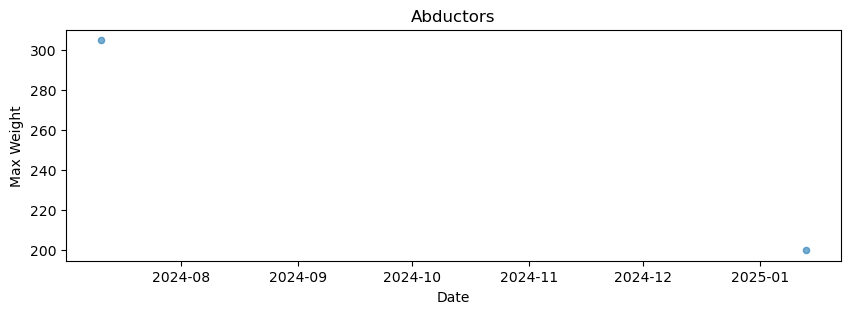

<Figure size 640x480 with 0 Axes>

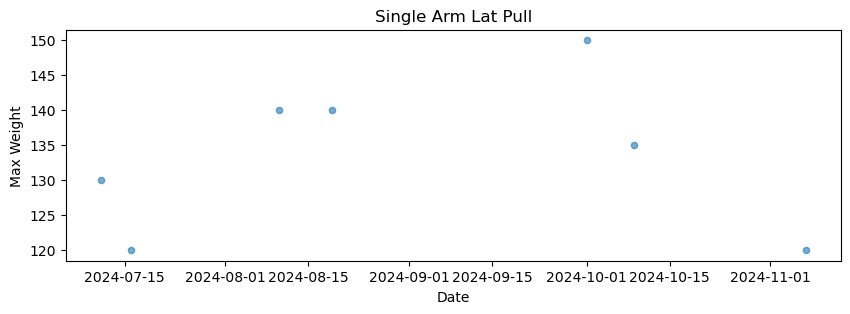

<Figure size 640x480 with 0 Axes>

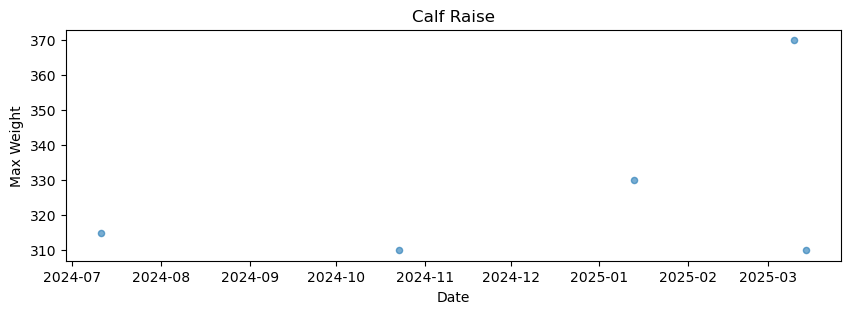

<Figure size 640x480 with 0 Axes>

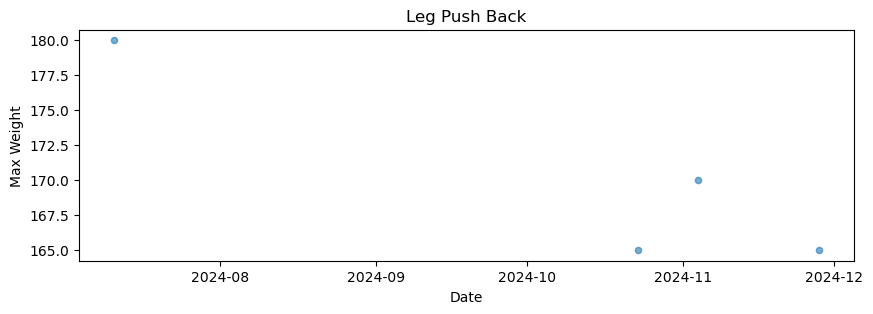

<Figure size 640x480 with 0 Axes>

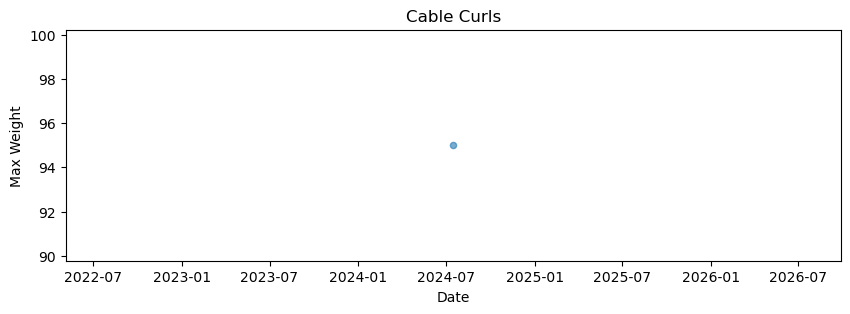

<Figure size 640x480 with 0 Axes>

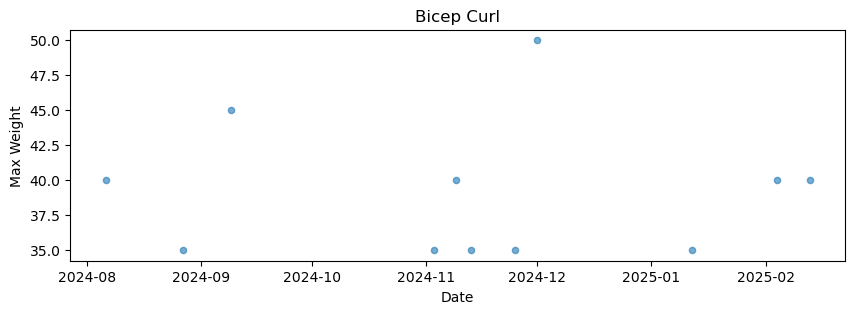

<Figure size 640x480 with 0 Axes>

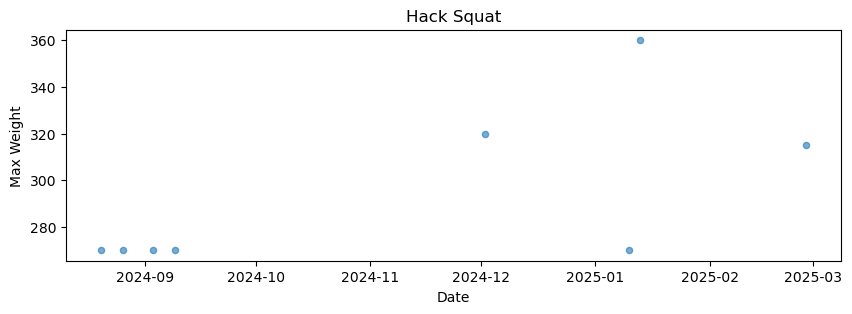

<Figure size 640x480 with 0 Axes>

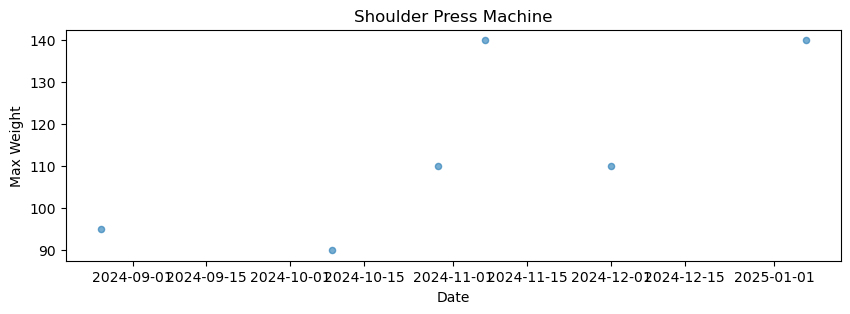

<Figure size 640x480 with 0 Axes>

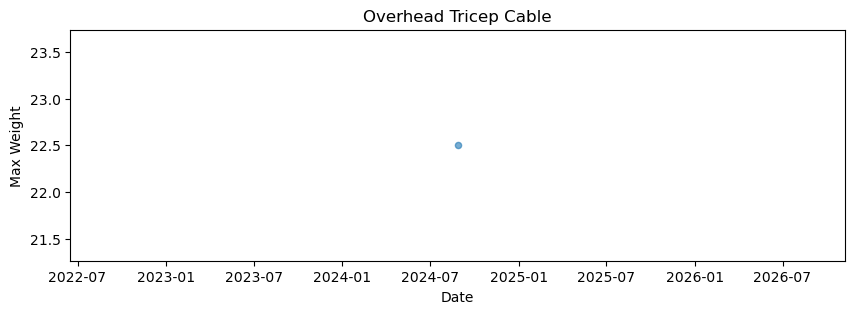

<Figure size 640x480 with 0 Axes>

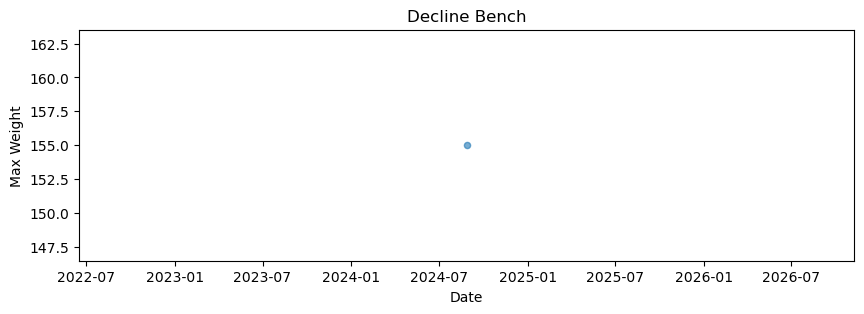

<Figure size 640x480 with 0 Axes>

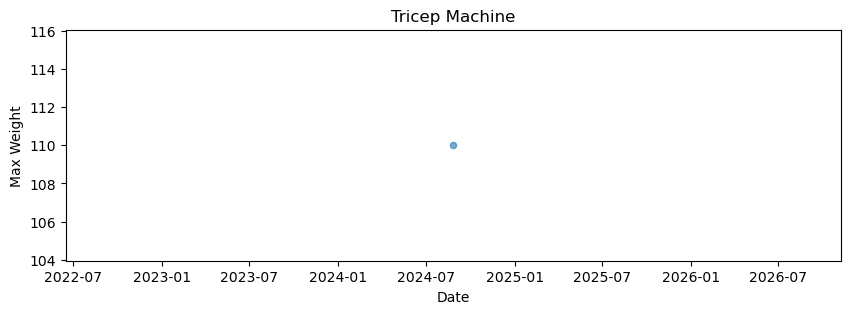

<Figure size 640x480 with 0 Axes>

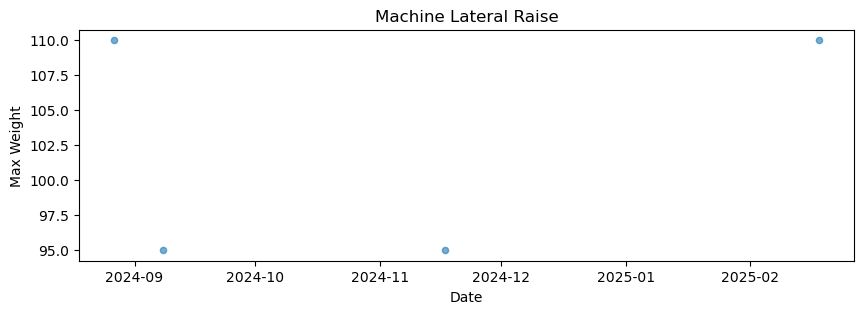

<Figure size 640x480 with 0 Axes>

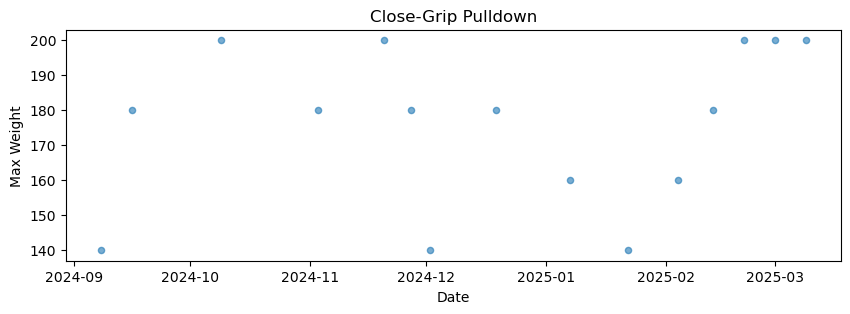

<Figure size 640x480 with 0 Axes>

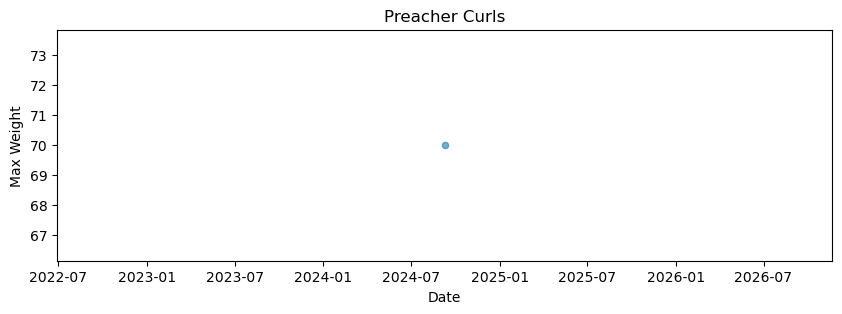

<Figure size 640x480 with 0 Axes>

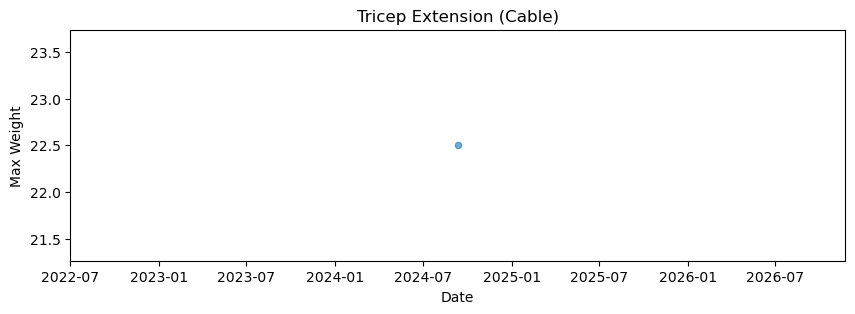

<Figure size 640x480 with 0 Axes>

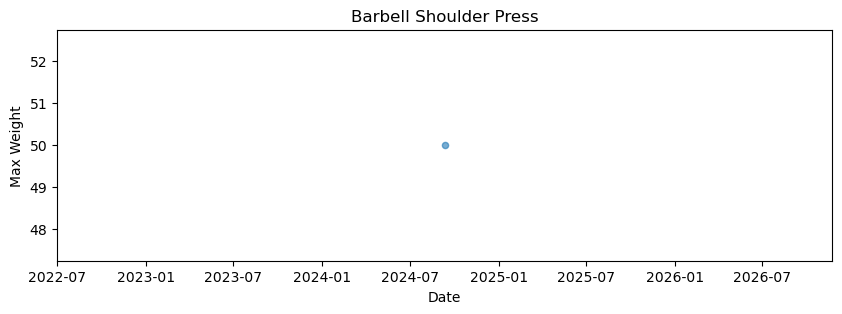

<Figure size 640x480 with 0 Axes>

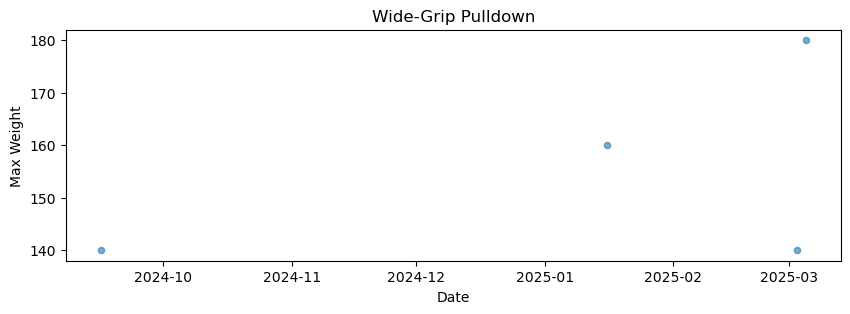

<Figure size 640x480 with 0 Axes>

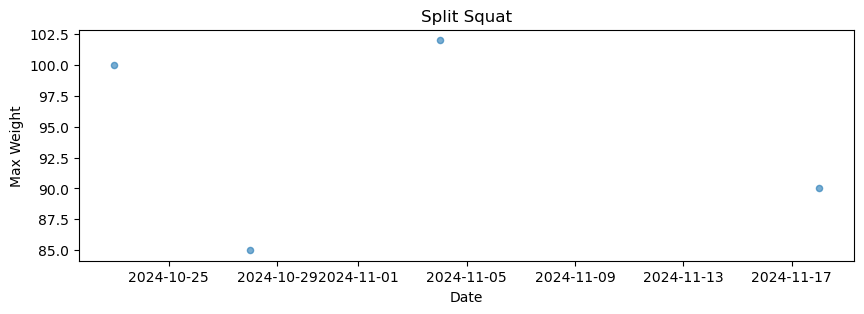

<Figure size 640x480 with 0 Axes>

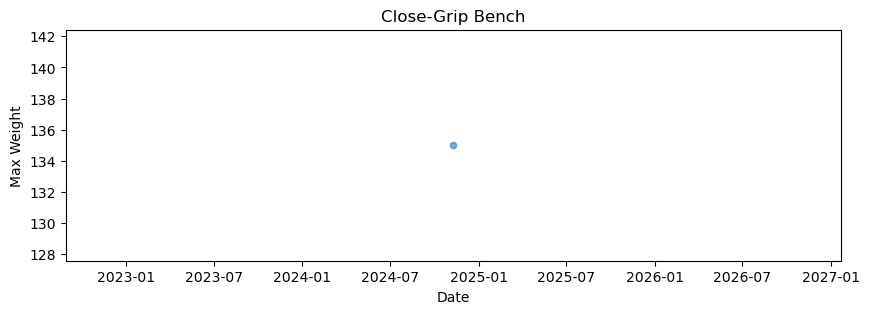

<Figure size 640x480 with 0 Axes>

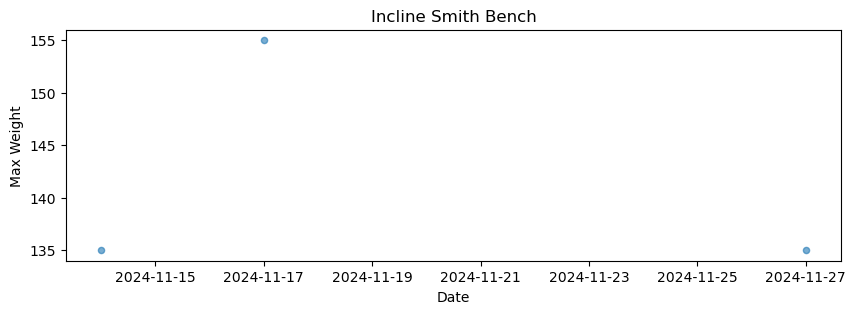

<Figure size 640x480 with 0 Axes>

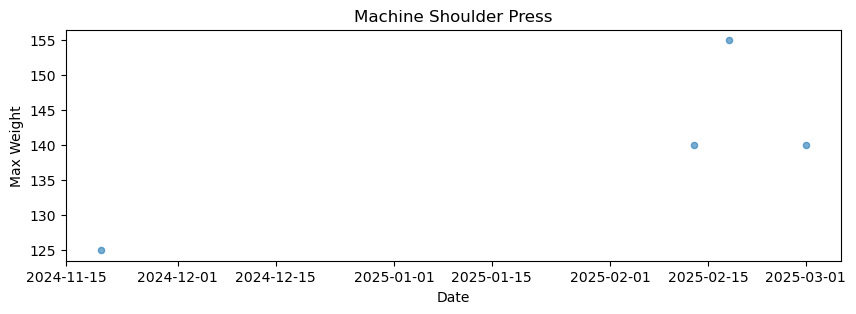

<Figure size 640x480 with 0 Axes>

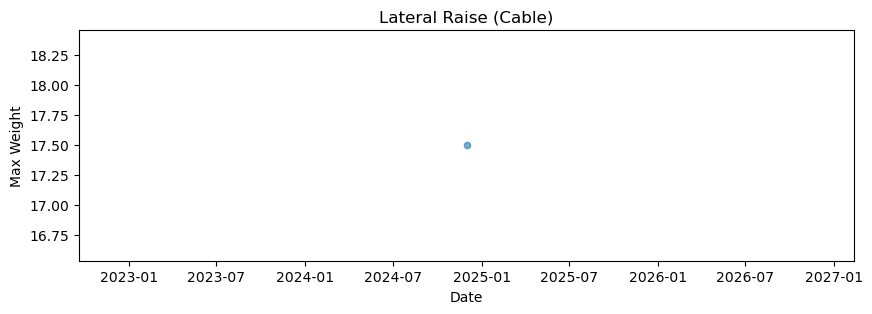

<Figure size 640x480 with 0 Axes>

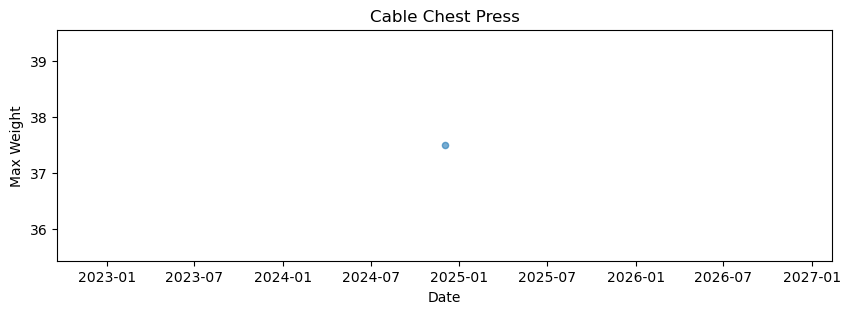

<Figure size 640x480 with 0 Axes>

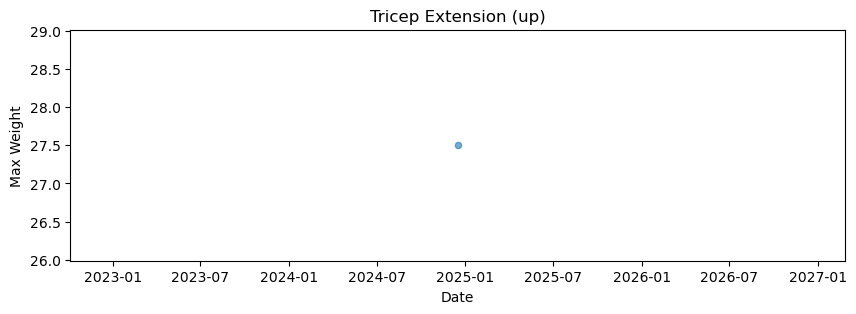

<Figure size 640x480 with 0 Axes>

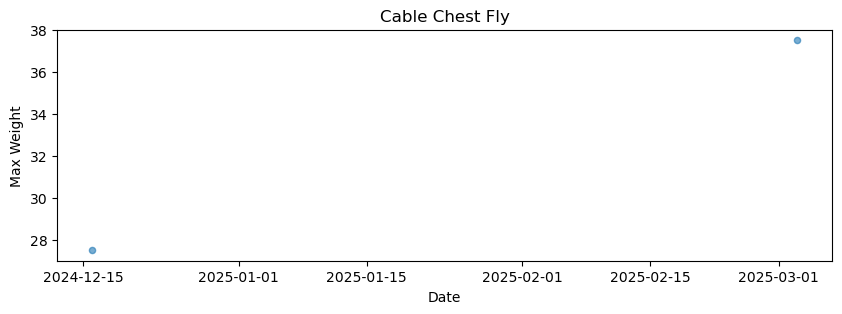

<Figure size 640x480 with 0 Axes>

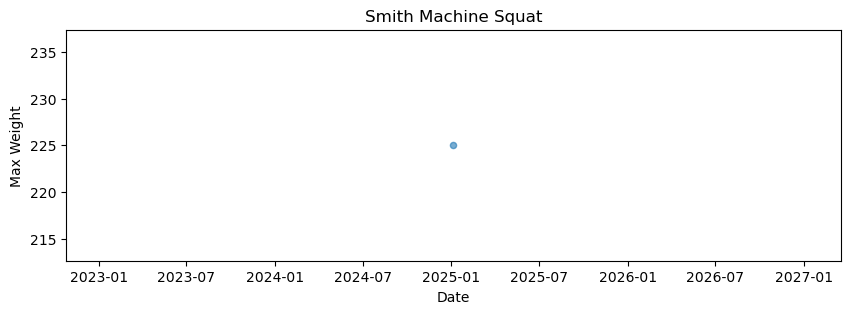

<Figure size 640x480 with 0 Axes>

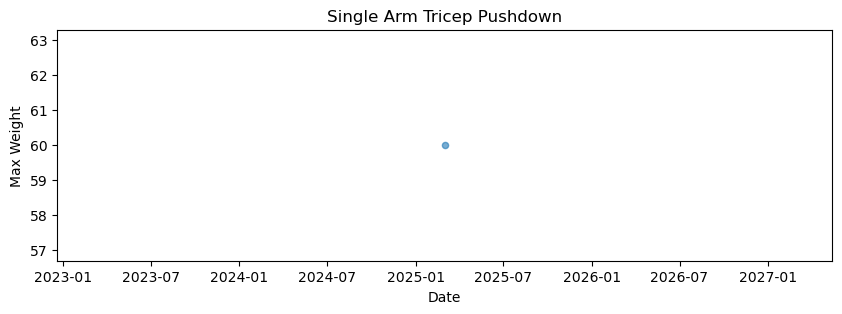

<Figure size 640x480 with 0 Axes>

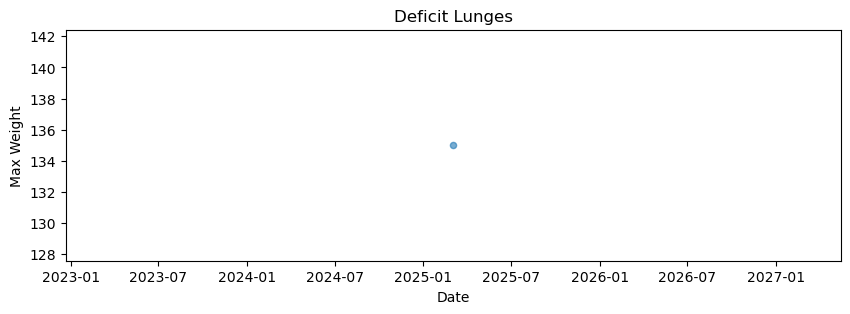

<Figure size 640x480 with 0 Axes>

In [ ]:
for exercise in df.Exercise.unique():
    data = df[df['Exercise'] == exercise]
    max_weight = data.groupby('Date')['Weight(lbs)'].max()
 
    plt.figure(figsize=(10, 3))
    plt.scatter(max_weight.index, max_weight.values, alpha=0.6, s=20)
    plt.xlabel('Date')
    plt.ylabel('Max Weight')
    plt.title(exercise)
    plt.show()
    plt.clf()

# Data Exploration

## Number of sets per muscle group per week

In [33]:
muscle_groups = np.concatenate([df['Primary Muscle Group'], df['Secondary Muscle Group']])
muscle_groups = np.unique(muscle_groups[muscle_groups != None])
print(muscle_groups)

['Abductors' 'Back' 'Biceps' 'Calves' 'Chest' 'Glutes' 'Hamstrings' 'Lats'
 'Low Back' 'Quads' 'Shoulders' 'Triceps']
